In [1]:
import numpy as pd # linear algebra operations
import pandas as pd # used for data prepartion
import seaborn as sns
from textblob import TextBlob #used for sentiment analysis
# Data Visualization
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt

# Data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Clustering Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

palette = sns.color_palette("Set1")
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


data = pd.read_csv("/content/employee_data.csv")

In [2]:
data

,ID,Gender,Experience (Years),Position,Salary
0,1,F,4,DevOps Engineer,109976
1,2,M,6,DevOps Engineer,120088
2,3,M,17,Web Developer,181301
3,4,M,7,Systems Administrator,77530
4,5,F,13,Systems Administrator,152397
...,...,...,...,...,...
395,396,F,19,Cloud Solutions Architect,236045
396,397,F,20,Web Developer,182770
397,398,F,9,Network Administrator,85550
398,399,M,18,Database Administrator (DBA),129996


In [3]:
data.head(10)

,ID,Gender,Experience (Years),Position,Salary
0,1,F,4,DevOps Engineer,109976
1,2,M,6,DevOps Engineer,120088
2,3,M,17,Web Developer,181301
3,4,M,7,Systems Administrator,77530
4,5,F,13,Systems Administrator,152397
5,6,F,13,Web Developer,114998
6,7,F,11,Systems Administrator,82328
7,8,M,2,DevOps Engineer,111494
8,9,F,6,DevOps Engineer,105563
9,10,F,6,IT Manager,162706


In [4]:
data.columns

Index(['ID', 'Gender', 'Experience (Years)', 'Position', 'Salary'], dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  400 non-null    int64 
 1   Gender              400 non-null    object
 2   Experience (Years)  400 non-null    int64 
 3   Position            400 non-null    object
 4   Salary              400 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 15.8+ KB


In [6]:
data.describe(include= 'object')

,Gender,Position
count,400,400
unique,2,11
top,M,Web Developer
freq,202,43


In [7]:
data.tail()

,ID,Gender,Experience (Years),Position,Salary
395,396,F,19,Cloud Solutions Architect,236045
396,397,F,20,Web Developer,182770
397,398,F,9,Network Administrator,85550
398,399,M,18,Database Administrator (DBA),129996
399,400,F,11,IT Security Analyst,169058


In [8]:
# Mengakses baris berdasarkan label
print(data.loc[0])  # Mengakses baris pertama

ID                                  1
Gender                              F
Experience (Years)                  4
Position              DevOps Engineer
Salary                         109976
Name: 0, dtype: object


In [10]:
# Mengakses baris dan kolom berdasarkan label
print(data.loc[0, 'Position'])  # Mengakses nilai di baris pertama, kolom 'Position'

DevOps Engineer


In [11]:
# Mengakses baris berdasarkan posisi/indeks
print(data.iloc[0])  # Mengakses baris pertama

ID                                  1
Gender                              F
Experience (Years)                  4
Position              DevOps Engineer
Salary                         109976
Name: 0, dtype: object


In [12]:
# Mengakses baris dan kolom berdasarkan posisi/indeks
print(data.iloc[0, 1])  # Mengakses nilai di baris pertama, kolom kedua (indeks 1)

F


In [13]:
data.loc[50:100, 'Gender':'Position']

,Gender,Experience (Years),Position
50,F,13,Network Administrator
51,F,12,Systems Administrator
52,M,17,IT Manager
53,M,14,Network Administrator
54,F,12,IT Manager
55,M,20,Systems Administrator
56,F,10,IT Manager
57,F,16,IT Security Analyst
58,M,0,IT Manager
59,M,2,Systems Analyst


In [14]:
data.groupby(['Position']).size()

Position
Cloud Solutions Architect       30
Database Administrator (DBA)    38
DevOps Engineer                 37
IT Manager                      40
IT Security Analyst             39
IT Support Specialist           31
Network Administrator           31
Software Engineer               36
Systems Administrator           38
Systems Analyst                 37
Web Developer                   43
dtype: int64

In [15]:
data.isna().sum()

ID                    0
Gender                0
Experience (Years)    0
Position              0
Salary                0
dtype: int64

In [16]:
data.isnull().sum()

ID                    0
Gender                0
Experience (Years)    0
Position              0
Salary                0
dtype: int64

In [17]:
data_cleaned = data.dropna()

In [18]:
data

,ID,Gender,Experience (Years),Position,Salary
0,1,F,4,DevOps Engineer,109976
1,2,M,6,DevOps Engineer,120088
2,3,M,17,Web Developer,181301
3,4,M,7,Systems Administrator,77530
4,5,F,13,Systems Administrator,152397
...,...,...,...,...,...
395,396,F,19,Cloud Solutions Architect,236045
396,397,F,20,Web Developer,182770
397,398,F,9,Network Administrator,85550
398,399,M,18,Database Administrator (DBA),129996


<Axes: xlabel='count', ylabel='Gender'>

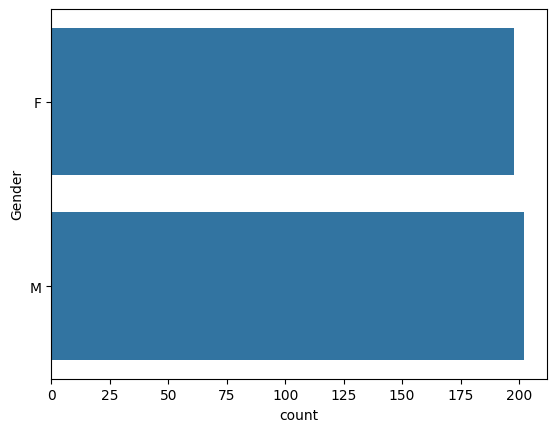

In [19]:
sns.countplot(data['Gender'])

<Axes: xlabel='count', ylabel='Position'>

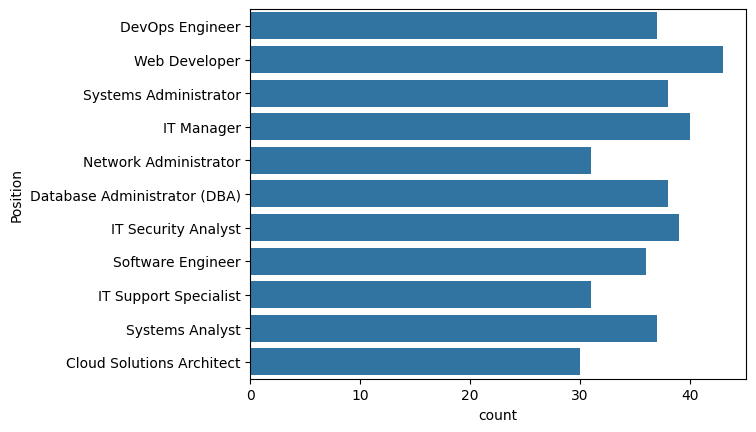

In [20]:
sns.countplot(data['Position'])

In [21]:
# Obtain the count of each gender in the dataset
gender_count = data['Gender'].value_counts()

# Create a pie chart to visualize the distribution of gender in the dataset
fig = px.pie(values=gender_count, names=gender_count.index)

# Enhance the plot by adding a title and labels
fig.update_layout(title="Distribution of Gender in the Dataset")

# Create a bar chart to visualize the distribution of gender in the dataset
fig2 = px.bar(y=gender_count, x=gender_count.index, color=gender_count.index)

# Display the plot
fig.show()
fig2.show()

In [22]:
# Create a box plot of Age by Gender
age_gender_boxplot = px.box(data, x='Gender', y='Experience (Years)', color='Gender', title='Distribution of Experience (Years) by Gender')

# Display the plot
age_gender_boxplot.show()

In [23]:
# Create a box plot of Age by Gender
anual_income_gender_boxplot = px.box(data, x='Gender', y='Salary', color='Gender', title='Distribution of Salary by Gender')

# Display the plot
anual_income_gender_boxplot.show()

In [27]:
# Create violin plot for Age versus Profession
fig1 = px.violin(data, x='Experience (Years)', y='Position', color='Position', title='Experience (Years) Distribution across Position')

# Create box plot for Salary versus Profession
fig2 = px.box(data, x='Salary', y='Position', color='Position', title='Salary Distribution across Position')

# Display the plots
fig1.show()
fig2.show()

In [29]:
# Extracting the count of each profession from the dataframe and storing in position_dis
position_dis = data.Position.value_counts()

# Extracting the names of each profession from the position_dis index
names = position_dis.index

# Creating a pie chart to visualize the distribution of position data values
fig = px.pie(values=position_dis, names=names, color=names)

# Setting the title of the plot
fig.update_layout(title_text='Distribution of Position Data Values')

# Displaying the plot
fig.show()

Data processing

In [30]:
data.head(10)

,ID,Gender,Experience (Years),Position,Salary
0,1,F,4,DevOps Engineer,109976
1,2,M,6,DevOps Engineer,120088
2,3,M,17,Web Developer,181301
3,4,M,7,Systems Administrator,77530
4,5,F,13,Systems Administrator,152397
5,6,F,13,Web Developer,114998
6,7,F,11,Systems Administrator,82328
7,8,M,2,DevOps Engineer,111494
8,9,F,6,DevOps Engineer,105563
9,10,F,6,IT Manager,162706


In [31]:
# define the categorical columns.
categorical_columns = ['Gender', 'Position']

# define the remarkable columns.
numerical_columns = ['Experience (Years)', 'Salary']

In [32]:
# Convert or categorical columns to numerical columns.
for cat_col in categorical_columns:

    # Initialise label encoder.
    encoder = LabelEncoder()

    # Apply transformation.
    data[cat_col] = encoder.fit_transform(data[cat_col])

In [33]:
data.head(10)

,ID,Gender,Experience (Years),Position,Salary
0,1,0,4,2,109976
1,2,1,6,2,120088
2,3,1,17,10,181301
3,4,1,7,8,77530
4,5,0,13,8,152397
5,6,0,13,10,114998
6,7,0,11,8,82328
7,8,1,2,2,111494
8,9,0,6,2,105563
9,10,0,6,3,162706


In [34]:
# Initialise standard scalar.
scaler = StandardScaler()

# Rescaled data.
data.drop(columns=['ID'], inplace=True)
full_data = scaler.fit_transform(data)

In [35]:
# Quick Look
full_data[:5]

array([[-1.0100505 , -0.93043259, -0.97832084, -0.50176812],
       [ 0.9900495 , -0.60223767, -0.97832084, -0.26821999],
       [ 0.9900495 ,  1.20283437,  1.53019414,  1.14556379],
       [ 0.9900495 , -0.43814021,  0.90306539, -1.25114535],
       [-1.0100505 ,  0.54644454,  0.90306539,  0.47799307]])

Data corelation

In [36]:
# Calculate correlation
corr = data.corr()

# Create the correlation matrix heatmap
fig = go.Figure(data=go.Heatmap(
                   z=corr.values,
                   x=corr.columns,
                   y=corr.columns,
                   colorscale='Viridis',
                   colorbar=dict(title='Correlation')))

# Update heatmap layout
fig.update_layout(title='Correlation Matrix Heatmap',
                  xaxis=dict(side='top'))

# Show the figure
fig.show()

Principal Component Analysis

In [37]:
# Instantiate a PCA object with 2 components for 2D data
pca_2D = PCA(n_components=2, random_state=42)

# Fit and transform the data to obtain the 2D projection
data_2D = pca_2D.fit_transform(full_data)


# Instantiate a PCA object with 3 components for 3D data
pca_3D = PCA(n_components=3, random_state=42)

# Fit and transform the data to obtain the 3D projection
data_3D = pca_3D.fit_transform(full_data)

In [38]:
# create a list to store the sum of squared distances for each k
ssd = []

# fit KMeans clustering with different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(full_data)
    ssd.append(kmeans.inertia_)

# create a dataframe with the k values and corresponding ssd
df = pd.DataFrame({'k': range(1, 11), 'ssd': ssd})

# create the line plot using Plotly Express
fig = px.line(df, x='k', y='ssd', title='Elbow Method')
fig.update_traces(mode='markers+lines', marker=dict(size=8))
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

Silhouette Method

In [39]:
# create a list to store the Calinski-Harabasz scores for each k
scores = []

# fit KMeans clustering with different values of k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(full_data)
    score = calinski_harabasz_score(full_data, kmeans.labels_)
    scores.append(score)

# create a dataframe with the k values and corresponding scores
df = pd.DataFrame({'No. of clusters(k)': range(2, 11), 'Calinski-Harabasz Score': scores})

# create the line plot using Plotly Express
fig = px.line(df, x='No. of clusters(k)', y='Calinski-Harabasz Score', title='Calinski-Harabasz Index')
fig.update_traces(mode='markers+lines', marker=dict(size=8))
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

 the Salary by Position, Experience, and Gender

In [3]:
employee_salary=data.groupby(['Position','Experience (Years)','Gender'])['Salary'].max().reset_index().sort_values(by='Salary',ascending=False)
employee_salary

,Position,Experience (Years),Gender,Salary
92,IT Manager,18,M,269950
91,IT Manager,18,F,268774
90,IT Manager,17,M,260594
16,Cloud Solutions Architect,14,M,252949
68,DevOps Engineer,19,F,242819
...,...,...,...,...
243,Web Developer,1,F,59145
128,IT Support Specialist,3,M,54938
122,IT Support Specialist,0,F,54739
124,IT Support Specialist,1,F,49817


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


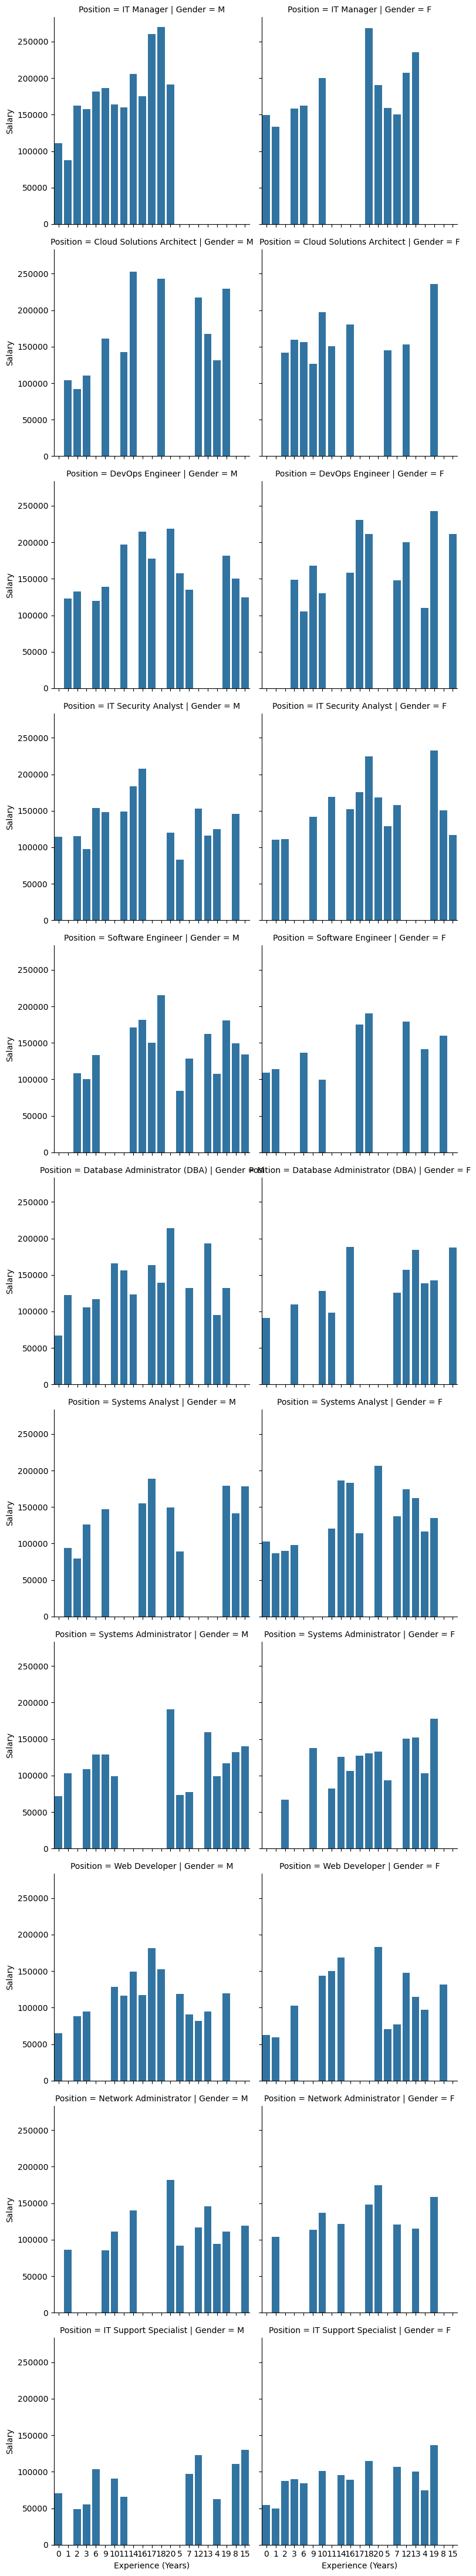

In [4]:
g = sns.FacetGrid(employee_salary, col="Gender", row="Position", height=4)
g.map(sns.barplot, "Experience (Years)", "Salary")
plt.show()

the number of employees by position, experince an gander

In [6]:
count_employee_salary=data.groupby(['Position','Experience (Years)','Gender'])['Salary'].count().reset_index().sort_values(by='Salary',ascending=False)
count_employee_salary

,Position,Experience (Years),Gender,Salary
83,IT Manager,10,F,4
167,Software Engineer,1,F,4
246,Web Developer,3,M,3
37,Database Administrator (DBA),13,M,3
47,DevOps Engineer,2,M,3
...,...,...,...,...
120,IT Security Analyst,20,F,1
121,IT Security Analyst,20,M,1
122,IT Support Specialist,0,F,1
123,IT Support Specialist,0,M,1


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


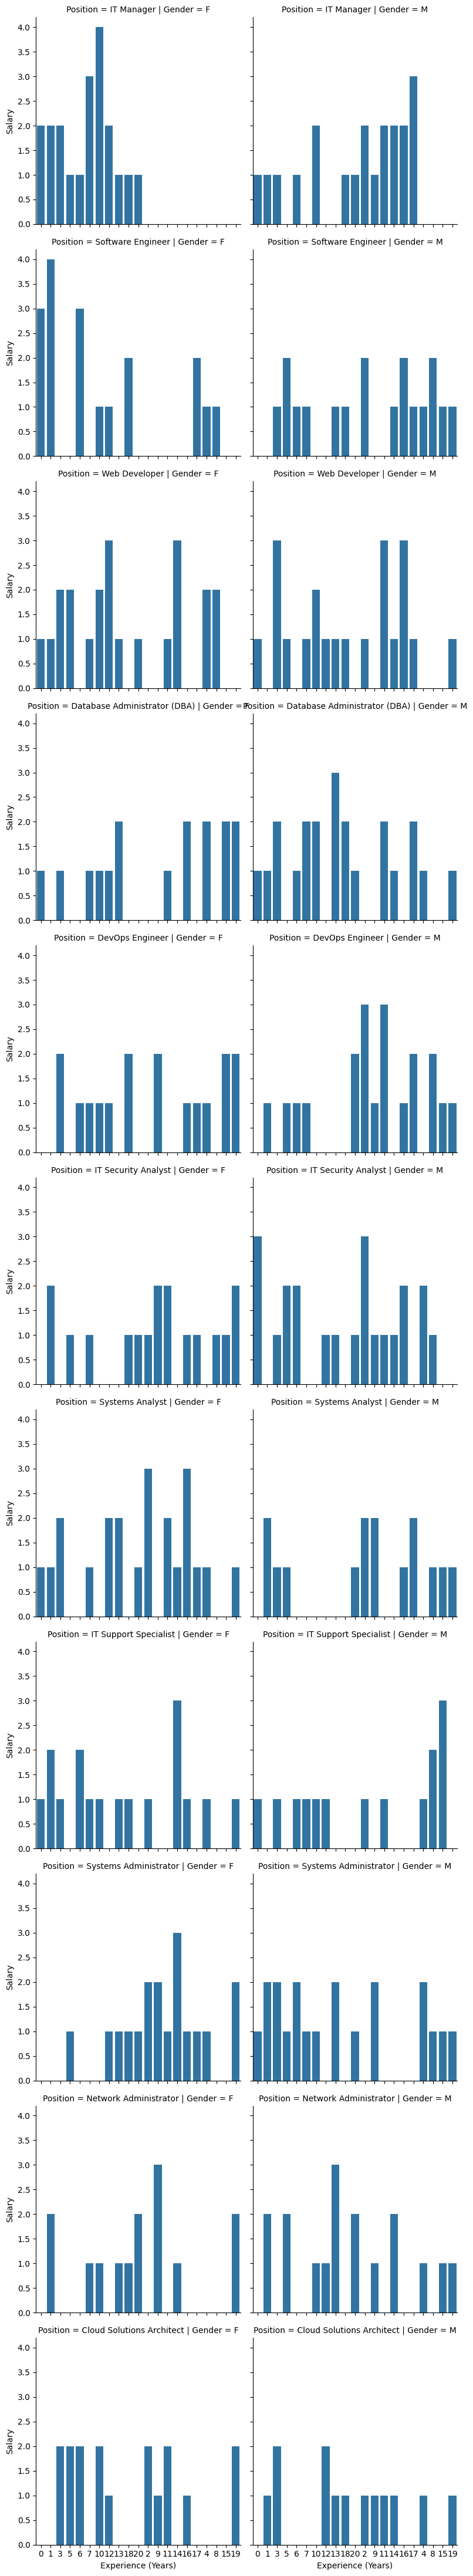

In [7]:
g = sns.FacetGrid(count_employee_salary, col="Gender", row="Position", height=4)
g.map(sns.barplot, "Experience (Years)", "Salary")
plt.show()

In [8]:
data['Experience (Years)'].mean()

9.67

In [9]:
data['Experience (Years)'].median()

10.0

In [10]:
data['Experience (Years)'].mode()

0    3
Name: Experience (Years), dtype: int64

In [11]:
kolom_khusus ='Experience (Years)'
rata_rata =data[kolom_khusus].mean()
simpangan_rata_rata = (data[kolom_khusus] - rata_rata).abs().mean()

print(f"Simpangan rata-rata pada kolom {kolom_khusus}:{simpangan_rata_rata}")

Simpangan rata-rata pada kolom Experience (Years):5.28655


In [12]:
kolom_khusus = 'Experience (Years)'
simpangan_baku = data[kolom_khusus].std()

print(f"Simpangan baku pada kolom {kolom_khusus}: {simpangan_baku}")

Simpangan baku pada kolom Experience (Years): 6.101571349441947
